# Load the data and fit a simple model
This simple example shows you how to load the data into a jupyter notebook and fit a simple model.

In [1]:
# Load in some libraries
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load in the data

In [2]:
# Relative path to data
trainPath = '../../data/train.csv'
testPath = '../../data/test.csv'

train = pd.read_csv(trainPath)
test = pd.read_csv(testPath)

### Look at the data

In [3]:
print "Shape of training data: " + str(train.shape)
print "Shape of test data: " + str(test.shape)

Shape of training data: (1460, 81)
Shape of test data: (1459, 80)


# Preprocessing

## Separating training and target data

In [4]:
# Pull out the Ids for the kaggle submission and drop from the test set (will only need test Ids.
testIds = test.pop('Id')
trainIds = train.pop('Id')

# Take the log of 1 plus sale price for training and submission
y = np.log1p(train.pop('SalePrice'))

print train.shape, test.shape, y.shape

(1460, 79) (1459, 79) (1460,)


### Merge train and test data for preprocessing

In [5]:
trainTest = pd.concat([train, test], axis=0)

print trainTest.shape

(2919, 79)


### Handle missing values for features where median/mean or most common value doesn't make sense

In [6]:
# Alley : data description says NA means "no alley access"
trainTest.loc[:, "Alley"] = trainTest.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
trainTest.loc[:, "BedroomAbvGr"] = trainTest.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
trainTest.loc[:, "BsmtQual"] = trainTest.loc[:, "BsmtQual"].fillna("No")
trainTest.loc[:, "BsmtCond"] = trainTest.loc[:, "BsmtCond"].fillna("No")
trainTest.loc[:, "BsmtExposure"] = trainTest.loc[:, "BsmtExposure"].fillna("No")
trainTest.loc[:, "BsmtFinType1"] = trainTest.loc[:, "BsmtFinType1"].fillna("No")
trainTest.loc[:, "BsmtFinType2"] = trainTest.loc[:, "BsmtFinType2"].fillna("No")
trainTest.loc[:, "BsmtFullBath"] = trainTest.loc[:, "BsmtFullBath"].fillna(0)
trainTest.loc[:, "BsmtHalfBath"] = trainTest.loc[:, "BsmtHalfBath"].fillna(0)
trainTest.loc[:, "BsmtUnfSF"] = trainTest.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
trainTest.loc[:, "CentralAir"] = trainTest.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
trainTest.loc[:, "Condition1"] = trainTest.loc[:, "Condition1"].fillna("Norm")
trainTest.loc[:, "Condition2"] = trainTest.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
trainTest.loc[:, "EnclosedPorch"] = trainTest.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
trainTest.loc[:, "ExterCond"] = trainTest.loc[:, "ExterCond"].fillna("TA")
trainTest.loc[:, "ExterQual"] = trainTest.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
trainTest.loc[:, "Fence"] = trainTest.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
trainTest.loc[:, "FireplaceQu"] = trainTest.loc[:, "FireplaceQu"].fillna("No")
trainTest.loc[:, "Fireplaces"] = trainTest.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
trainTest.loc[:, "Functional"] = trainTest.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
trainTest.loc[:, "GarageType"] = trainTest.loc[:, "GarageType"].fillna("No")
trainTest.loc[:, "GarageFinish"] = trainTest.loc[:, "GarageFinish"].fillna("No")
trainTest.loc[:, "GarageQual"] = trainTest.loc[:, "GarageQual"].fillna("No")
trainTest.loc[:, "GarageCond"] = trainTest.loc[:, "GarageCond"].fillna("No")
trainTest.loc[:, "GarageArea"] = trainTest.loc[:, "GarageArea"].fillna(0)
trainTest.loc[:, "GarageCars"] = trainTest.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
trainTest.loc[:, "HalfBath"] = trainTest.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
trainTest.loc[:, "HeatingQC"] = trainTest.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
trainTest.loc[:, "KitchenAbvGr"] = trainTest.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
trainTest.loc[:, "KitchenQual"] = trainTest.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
trainTest.loc[:, "LotFrontage"] = trainTest.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
trainTest.loc[:, "LotShape"] = trainTest.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
trainTest.loc[:, "MasVnrType"] = trainTest.loc[:, "MasVnrType"].fillna("None")
trainTest.loc[:, "MasVnrArea"] = trainTest.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
trainTest.loc[:, "MiscFeature"] = trainTest.loc[:, "MiscFeature"].fillna("No")
trainTest.loc[:, "MiscVal"] = trainTest.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
trainTest.loc[:, "OpenPorchSF"] = trainTest.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
trainTest.loc[:, "PavedDrive"] = trainTest.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
trainTest.loc[:, "PoolQC"] = trainTest.loc[:, "PoolQC"].fillna("No")
trainTest.loc[:, "PoolArea"] = trainTest.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
trainTest.loc[:, "SaleCondition"] = trainTest.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
trainTest.loc[:, "ScreenPorch"] = trainTest.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
trainTest.loc[:, "TotRmsAbvGrd"] = trainTest.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
trainTest.loc[:, "Utilities"] = trainTest.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
trainTest.loc[:, "WoodDeckSF"] = trainTest.loc[:, "WoodDeckSF"].fillna(0)

### Some numerical features are actually really categories

In [7]:
trainTest = trainTest.replace({"MSSubClass" : {20 : "SC20", 
                                       30 : "SC30", 
                                       40 : "SC40", 
                                       45 : "SC45", 
                                       50 : "SC50", 
                                       60 : "SC60", 
                                       70 : "SC70", 
                                       75 : "SC75", 
                                       80 : "SC80", 
                                       85 : "SC85", 
                                       90 : "SC90", 
                                       120 : "SC120", 
                                       150 : "SC150", 
                                       160 : "SC160", 
                                       180 : "SC180", 
                                       190 : "SC190"},
                       "MoSold" : {1 : "Jan", 
                                   2 : "Feb", 
                                   3 : "Mar", 
                                   4 : "Apr", 
                                   5 : "May", 
                                   6 : "Jun",
                                   7 : "Jul", 
                                   8 : "Aug", 
                                   9 : "Sep", 
                                   10 : "Oct", 
                                   11 : "Nov", 
                                   12 : "Dec"}
                      })

### Encode some categorical features as ordered numbers when there is information in the order

In [8]:
trainTest = trainTest.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## Feature Engineering

In [9]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = trainTest.select_dtypes(include = ["object"]).columns
numerical_features = trainTest.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
trainTest_num = trainTest[numerical_features]
trainTest_cat = trainTest[categorical_features]

Numerical features : 53
Categorical features : 26


In [10]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandrua Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = trainTest_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
trainTest_num[skewed_features] = np.log1p(trainTest_num[skewed_features])

38 skewed numerical features to log transform


/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in trainTest : " + str(trainTest_num.isnull().values.sum()))
trainTest_num = trainTest_num.fillna(trainTest_num.median())
print("Remaining NAs for numerical features in trainTest : " + str(trainTest_num.isnull().values.sum()))

NAs for numerical features in trainTest : 162
Remaining NAs for numerical features in trainTest : 0


In [12]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in trainTest : " + str(trainTest_cat.isnull().values.sum()))
trainTest_cat = pd.get_dummies(trainTest_cat)
print("Remaining NAs for categorical features in trainTest : " + str(trainTest_cat.isnull().values.sum()))

NAs for categorical features in trainTest : 8
Remaining NAs for categorical features in trainTest : 0


In [13]:
# Join categorical and numerical features
trainTest = pd.concat([trainTest_num, trainTest_cat], axis = 1)
print("New number of features : " + str(trainTest.shape[1]))

New number of features : 257


### Separate training and test data once more

In [14]:
# Now split out the train and test sets again 
train = trainTest.iloc[0:train.shape[0],:]
test = trainTest.iloc[train.shape[0]:,:]

print train.shape, test.shape

(1460, 257) (1459, 257)


## Model fitting

In [15]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.15, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1241, 257)
X_test : (219, 257)
y_train : (1241,)
y_test : (219,)


In [16]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])
test.loc[:, numerical_features] = stdSc.transform(test.loc[:,numerical_features])

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Function for evaluating the fit of different models

In [17]:
def tryModel(model, X_train, y_train, X_test, y_test, makeSubmission=True):
    """
    model: a fitted sklearn model
    X_train: the training data used to train `model`
    y_train: the target data used to train `model`
    X_test: the test data for evaluating `model`
    y_test: the test target data for evaluating the `model`
    """
    
    # Predict on new data and plot the results
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Plot the results
    sns.regplot(x=y_test, y=y_test_pred-y_test);
    
    # Evaluate the rms error on the train set:
    rmse_log_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse_abs_train = np.sqrt(mean_squared_error(np.exp(y_train_pred), np.exp(y_train)))

    print  "Training Set Errors:" \
           "\nTypical log error in housing sale price prediction: " + str(rmse_log_train) + \
           "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs_train)

    # Evaluate the rms error on the validation set:
    rmse_log = np.sqrt(mean_squared_error(y_test_pred, y_test))
    rmse_abs = np.sqrt(mean_squared_error(np.exp(y_test_pred), np.exp(y_test)))

    print  "\nValidation Set Errors:" \
           "\nTypical log error in housing sale price prediction: " + str(rmse_log) + \
           "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs)
    
    if makeSubmission:
        # Generating the submission
        yTestPred = np.exp(model.predict(test))-1
        dfSubmissions = pd.DataFrame(zip(testIds.as_matrix(), yTestPred), columns=['Id', 'SalePrice'])
        
        print '\nHead of submission dataframe:'
        print(dfSubmissions.head())

        model_name = model.__class__.__name__
        now = datetime.now().strftime('%Y%m%d_%H%M%S')
        outFile = '../../data/submissions/' + str(now) + '_' + model_name + '.csv'
        dfSubmissions.to_csv(outFile, index=False)
        
        print '\nSubmission saved to: ' + outFile

### Try some models!

#### Random Forest
First let's try sklearn's Random Forest Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(verbose=False,
                              max_depth=None,
                              n_estimators=500,
                              oob_score=True,
                             n_jobs=6)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=6, oob_score=True, random_state=None,
           verbose=False, warm_start=False)

Training Set Errors:
Typical log error in housing sale price prediction: 0.0528584560105
Typical absolute error in housing sale price prediction: $10865.2614006

Validation Set Errors:
Typical log error in housing sale price prediction: 0.130303877951
Typical absolute error in housing sale price prediction: $29455.3296294

Head of submission dataframe:
     Id  SalePrice
0  1461 124321.942
1  1462 153068.719
2  1463 181511.095
3  1464 181030.716
4  1465 194060.517

Submission saved to: ../../data/submissions/20170616_232306_RandomForestRegressor.csv


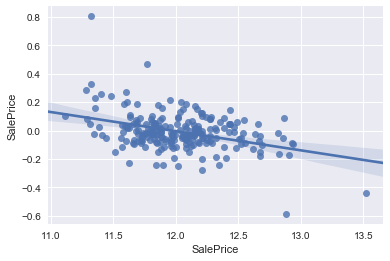

In [19]:
tryModel(model, X_train, y_train, X_test, y_test)

#### ElasticNet

In [22]:
from sklearn.linear_model import ElasticNetCV

# The parameters to search over in the GridSearchCV run
alphas = np.logspace(-4,-2,15)
l1_ratios = np.linspace(0.25,0.75,15)

# The model with GridSearchCV
model = ElasticNetCV(l1_ratio=l1_ratios,
                     alphas=alphas,
                     max_iter=5000,
                     cv=20,
                    n_jobs=6)

model.fit(X_train, y_train)

print "Best l1_ratio :", model.l1_ratio_
print "Best alpha :", model.alpha_

Best l1_ratio : 0.357142857143
Best alpha : 0.00138949549437


Training Set Errors:
Typical log error in housing sale price prediction: 0.108171827015
Typical absolute error in housing sale price prediction: $23439.055963

Validation Set Errors:
Typical log error in housing sale price prediction: 0.122171428073
Typical absolute error in housing sale price prediction: $30822.5548424

Head of submission dataframe:
     Id  SalePrice
0  1461 113403.451
1  1462 159130.632
2  1463 177066.803
3  1464 194987.979
4  1465 200906.813

Submission saved to: ../../data/submissions/20170616_232536_ElasticNetCV.csv


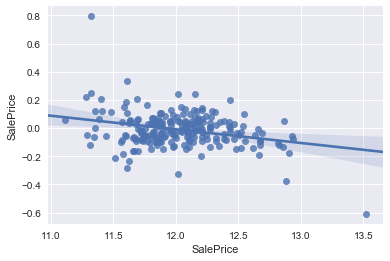

In [23]:
tryModel(model, X_train, y_train, X_test, y_test)